## ВШЭ, ФКН, Программа "Специалист по Data Science" (2021/2022)
## Курс "Машинное обучение"
## ДЗ №2: Линейная регрессия и градиентные методы обучения
## Выполнил: Кирилл Н., ibnkir@yandex.ru, 13.01.2022 г.
***

## Часть 1. Gradient Descent [8 баллов]
* [Задание 1.1](#task1) [1 балл]
* [Задание 1.2](#task2) [2 балла]
* [Задание 1.3](#task3) [3 балла]
* [Задание 1.4](#task4) [2 балла]

## Часть 2. Linear Regression [8 баллов] + 2 бонусных
* [Задание 2.1](#task21) [1 балл]
* [Задание 2.2](#task22) [1 балл]
* [Задание 2.3](#task23) [1 балл]
* [Задание 2.4](#task24) [1 балл]
* [Задание 2.5](#task25) [1 балл]
* [Задание 2.6](#task26) [1 балл]
* [Задание 2.7](#task27) [1 балл]
* [Задание 2.8](#task28) [1 балл]
* [Задание 2.9](#task29) [2 баллa]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{16},$$ где $s$ - сумма набранных балов. С учетом бонусов, за домашнее задание можно получить > 10 балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

## Часть 1. Gradient Descent

Среднеквадратичная ошибка на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) представляется следующим образом:

$$
Q(w) = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [62]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# загружаем данные
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

### Задание 1.1 <a id="task1"></a>

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец (первый), заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

Например, если на вход подается матрица 
$$
\begin{pmatrix}
2 & 4 & 4200\\
0 & 10 & 5000\\
2 & 2 & 1000\\
\end{pmatrix},
$$
то на выходе будет матрица
$$
\begin{pmatrix}
1 & 2 & 4 & 4200\\
1 & 0 & 10 & 5000\\
1 & 2 & 2 & 1000\\
\end{pmatrix}$$

**Hint**
- Вам могут пригодиться функции `np.concatenate`, `np.ones`

In [63]:
# create function
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    # your code here
    ones = np.ones((X.shape[0],1))
    X = np.concatenate((ones,X), axis=1)
    return X

# apply to train and test
# your code here
X_train = add_identity_feature(X_train)
X_test = add_identity_feature(X_test)

In [64]:
# test yourself
assert X_train.shape == (354, 14)
assert len(X_train) == X_train.sum(axis=0)[0]

assert X_test.shape == (152, 14)
assert len(X_test) == X_test.sum(axis=0)[0]

### Задание 1.2 <a id="task2"></a>

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

**Hint** 
- Для умножения матрицы на вектор (или матрицы на матрицу) можно использовать функцию `np.dot`. 
- Не забывайте, что оператор `*` используется только для поэлементного умножения.
- Также может пригодиться функция `np.linalg.norm`

In [65]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    # your code here
    delta = np.dot(X, w) - y
    loss = np.dot(delta, delta) / X.shape[0]
    return loss


def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    # your code here
    delta = np.dot(X,w)-y
    grad = 2 * np.dot(X.T, delta) / X.shape[0]
    return grad

Посчитайте `result_mse_sklearn` используя функцию `mean_squared_error` из sklearn, чтобы сравнить c результатом вашей функции

In [66]:
from sklearn.metrics import mean_squared_error

w = np.zeros(X_train.shape[1])

result_mse_custom = mse_loss(X_train, y_train, w)
result_mse_grad = mse_grad(X_train, y_train, w)

result_mse_sklearn = mean_squared_error(y_train, np.dot(X_train, w)) # your code here

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-43.9424,  -99.9887, -675.8766, -444.0919,   -3.0395,  
                                              -23.5569,   -282.6831,  -2829.3631,   -177.206 ,  -373.6983,
                                              -16820.8966,   -796.6377, -16136.5175,   -477.6308]),rtol=1e-03)

### Задание 1.3  <a id="task3"></a>

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен возвращать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов:

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). 
$$
w^{t+1} = w^t - \eta \nabla Q(w^t)
$$
Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.

3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [67]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=100, tol=1e-6, eta=1e-6):
        """
        ARGUMENTS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)
        X - np.array of shape (ℓ, d)
        y - np.array of shape (ℓ,)
        
        OUTPUT:
        loss_hist - list 
        """
        
        self.w = np.zeros(X.shape[1])
        self.loss_history = [mse_loss(X, y, self.w)]
        for t in range(max_iter):
            # your code here
            w_pred = self.w
            self.w = w_pred - eta * mse_grad(X, y, w_pred)
            self.loss_history.append(mse_loss(X, y, self.w))
            delta_w = self.w - w_pred
            if np.sqrt(np.dot(delta_w, delta_w)) < tol:
                break
        return self.loss_history
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        # your code here
        y_pred = np.dot(X, self.w)
        return y_pred

Проверьте работу вашего класса. 
- Обучите линейную регрессию на обучающей части выборки.
- Постройте график зависимости значения функционала потерь от итерации градиентного спуска. 
- Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. 
- Добейтесь того, чтобы значение MSE не превышало 100.

In [68]:
lr = CustomLinearRegressionGD()
# your code here
loss_history = lr.fit(X_train, y_train) # Оставляем значение шага по умолчанию

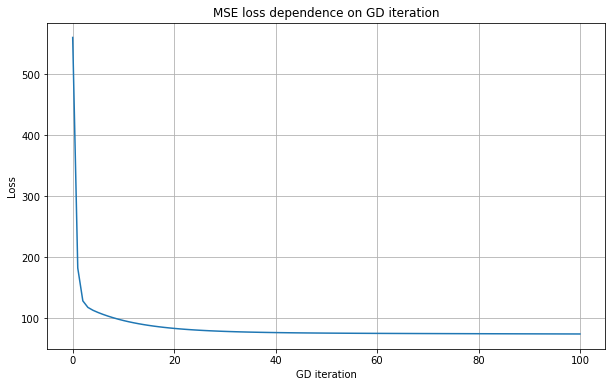

In [69]:
# График зависимости значения функционала потерь от итерации градиентного спуска
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [70]:
y_pred = lr.predict(X_test)

mse_test_custom = mse_loss(X_test, y_test, lr.w)
print("mse_test_custom: {:.4f}".format(mse_test_custom))

mse_test_sklearn = mean_squared_error(y_test, y_pred)
print("mse_test_sklearn: {:.4f}".format(mse_test_sklearn))

assert len(loss_history) <= 1000
assert mse_test_sklearn <= 100
assert mse_test_custom <= 100

mse_test_custom: 93.8658
mse_test_sklearn: 93.8658


### Задание 1.4 <a id="task4"></a>

Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного.

Примените линейную регрессию с градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 100.

Опишите наблюдения. Изменилась ли ситуация?

In [71]:
# scale the data
# your code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)
X_train_scaled = add_identity_feature(X_train_scaled)
X_test_scaled = add_identity_feature(X_test_scaled)

# train linear regression with gradient descent
# your code here
loss_history = lr.fit(X_train_scaled, y_train, eta=1e-2) # Увеличили шаг градиента в 10000 раз с 1e-6 до 1e-2 

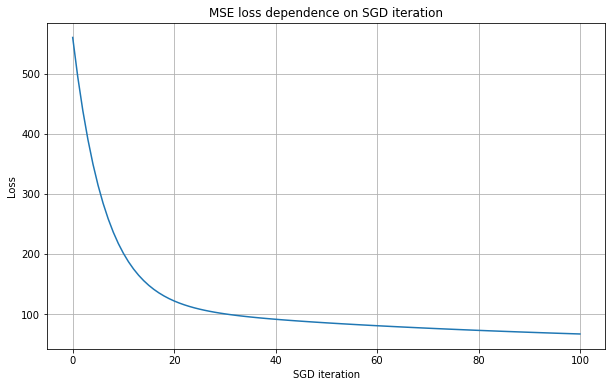

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

``` Опишите свои наблюдения.```

<span style="color:blue">
Масштабирование позволило увеличить шаг градиента в 10000 раз и сделало функцию потерь более чувствительной,
в результате этого выросла скорость обучения. 
</span>

In [73]:
mse_test_custom = mse_loss(X_test_scaled, y_test, lr.w)
print("mse_test_custom: {:.4f}".format(mse_test_custom))
assert mse_test_custom <= 100

mse_test_custom: 90.8480


## Часть 2. Linear Regression

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

Данные можно скачать [тут](https://raw.githubusercontent.com/WeaselCMC/ml_dpo_2021/master/hw/hw2/train.csv)

In [75]:
data = pd.read_csv('train.csv', header=0)
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Задание 2.1 <a id="task21"></a>

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [77]:
# your code here
#!pip install tabulate
from tabulate import tabulate
def print_cols_with_na(df):
    tab_rows = []
    tab_header = ['Столбец', 'Кол-во пропусков', '% от общего числа значений']

    print("Столбцы с пропусками:")
    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count:
            null_perc = null_count/df.shape[0]*100
            tab_rows.append([column, null_count, '{:.2f}%'.format(null_perc)])
    print(tabulate(tab_rows, tab_header, tablefmt="pretty"))

print_cols_with_na(data)

Столбцы с пропусками:
+--------------+------------------+----------------------------+
|   Столбец    | Кол-во пропусков | % от общего числа значений |
+--------------+------------------+----------------------------+
| LotFrontage  |       259        |           17.74%           |
|    Alley     |       1369       |           93.77%           |
|  MasVnrType  |        8         |           0.55%            |
|  MasVnrArea  |        8         |           0.55%            |
|   BsmtQual   |        37        |           2.53%            |
|   BsmtCond   |        37        |           2.53%            |
| BsmtExposure |        38        |           2.60%            |
| BsmtFinType1 |        37        |           2.53%            |
| BsmtFinType2 |        38        |           2.60%            |
|  Electrical  |        1         |           0.07%            |
| FireplaceQu  |       690        |           47.26%           |
|  GarageType  |        81        |           5.55%            |
| G

``` Опишите свои наблюдения.```

<span style="color:blue">
Как и следовало ожидать, наибольшее кол-во пропусков наблюдается во второстепенных признаках, 
содержащих субъективные качественные оценки (качество ограды, камина, бассейна, состояние гаража и т.п.). 
</span>

### Задание 2.2 <a id="task22"></a>

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке.

Проверьте, что вы действительно избавились от пропусков.

In [78]:
# your code here
# Заполняем пропуски
cat_features_mask = (data.dtypes == "object").values
cat_data = data[data.columns[cat_features_mask]]
num_data = data[data.columns[~cat_features_mask]]

cat_imp = SimpleImputer(strategy="constant", fill_value='NaN')
cat_data = pd.DataFrame(data=cat_imp.fit_transform(cat_data), columns=cat_data.columns)

num_imp = SimpleImputer(strategy="mean")
num_data = pd.DataFrame(data=num_imp.fit_transform(num_data), columns=num_data.columns)

# Заполненный датасет data2
data2 = pd.concat([num_data, cat_data], axis=1)
print_cols_with_na(data2)

Столбцы с пропусками:
+---------+------------------+----------------------------+
| Столбец | Кол-во пропусков | % от общего числа значений |
+---------+------------------+----------------------------+
+---------+------------------+----------------------------+


### Задание 2.3 <a id="task23"></a>

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). 

**Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

In [79]:
# your code here
# Масштабируем числовые признаки, за исключением SalePrice
scaler = StandardScaler()

num_x_columns = []
for column in data2.columns:
    if column == 'SalePrice':
        continue
    if (data2[column].dtype == np.int64) or (data2[column].dtype == np.float64):
        num_x_columns.append(column)

cat_features_mask = (data2.dtypes == "object").values        
cat_data = data2[data2.columns[cat_features_mask]]
num_x_data = pd.DataFrame(data=scaler.fit_transform(data2[num_x_columns]), columns=num_x_columns)

# Заполненный и отмасштабированный датасет data3
data3 = pd.concat([num_x_data, cat_data, data2['SalePrice']], axis=1)

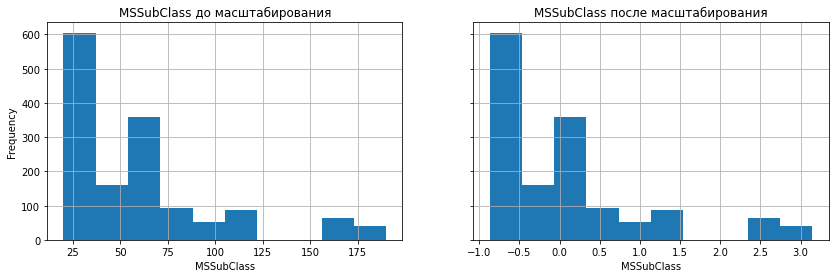

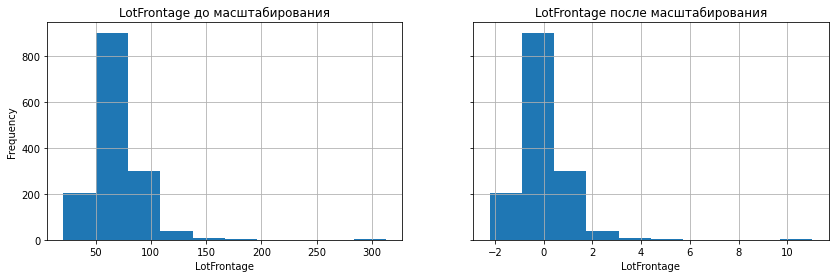

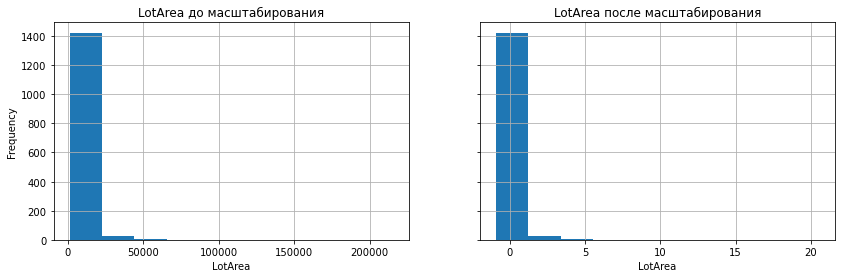

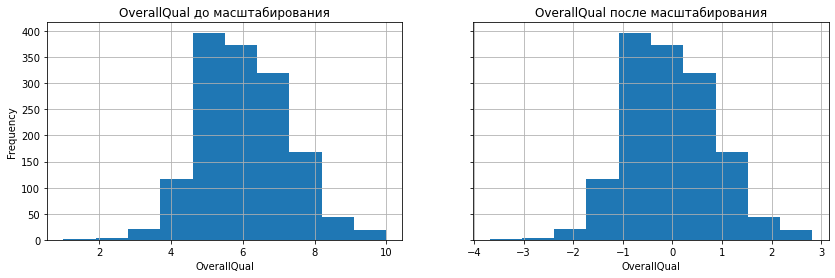

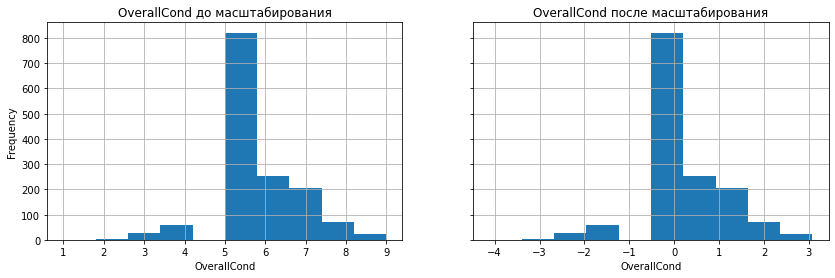

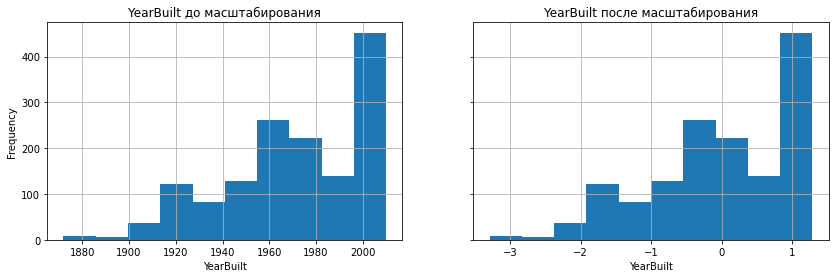

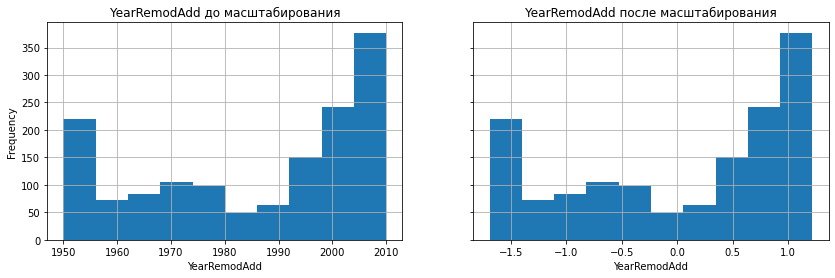

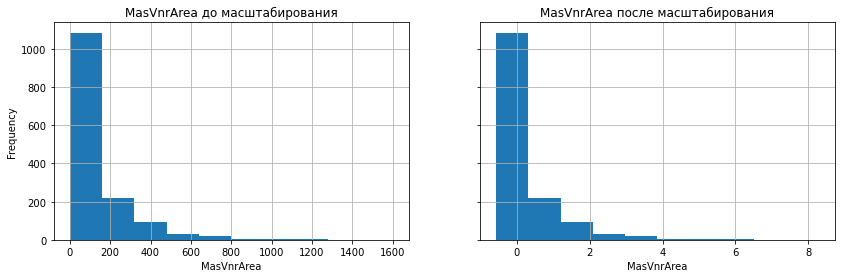

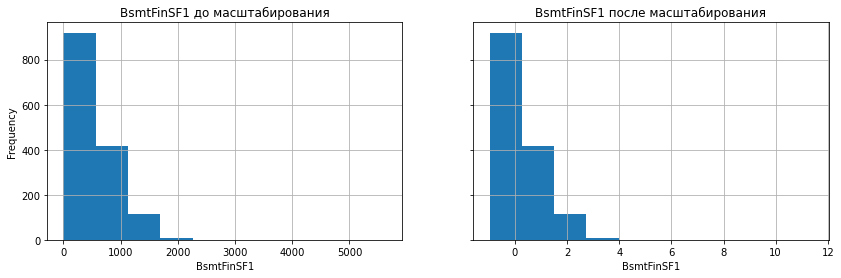

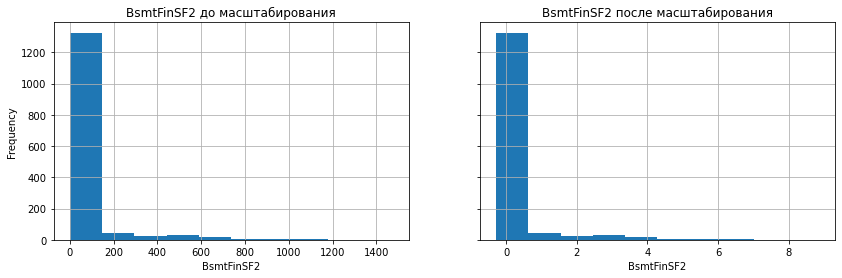

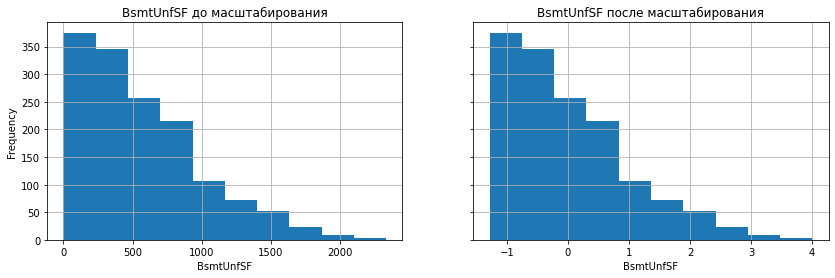

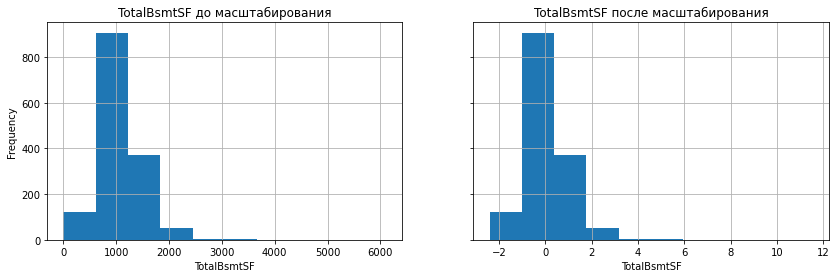

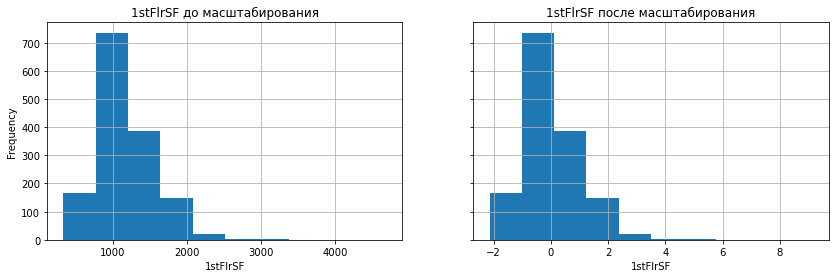

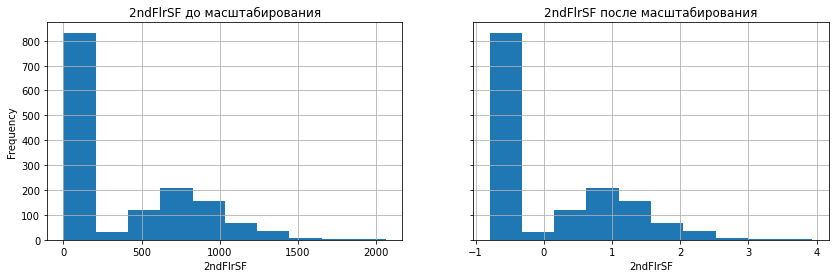

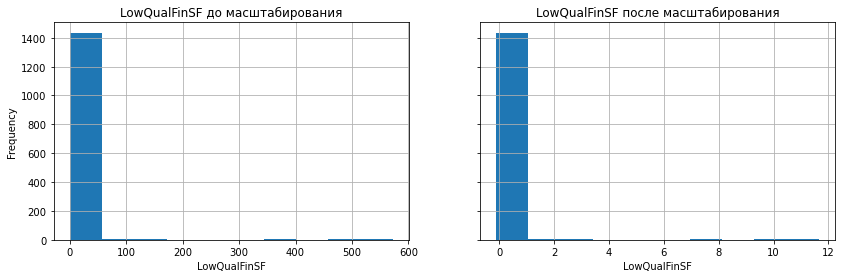

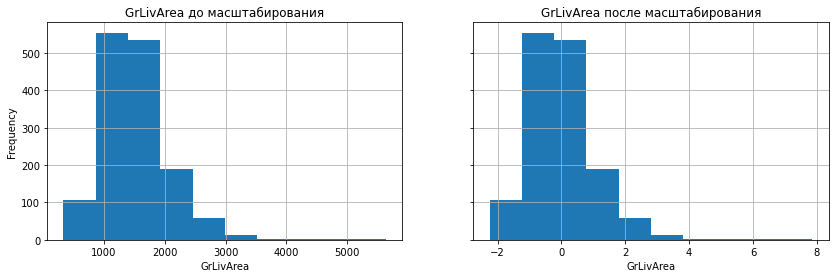

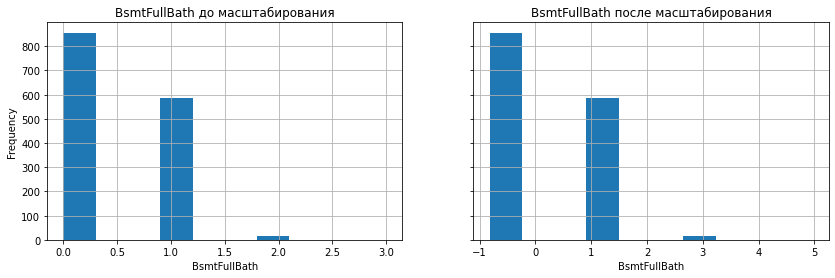

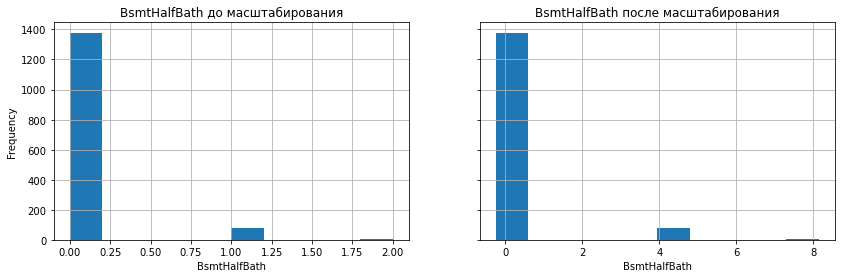

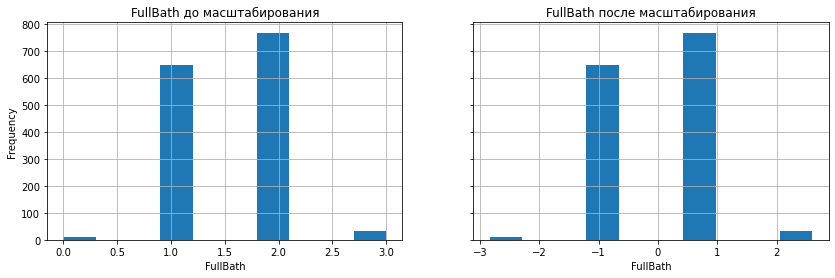

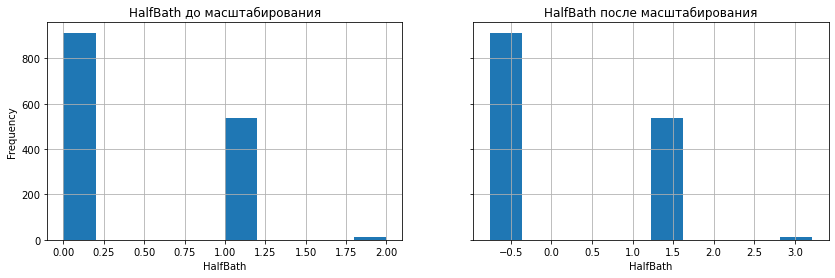

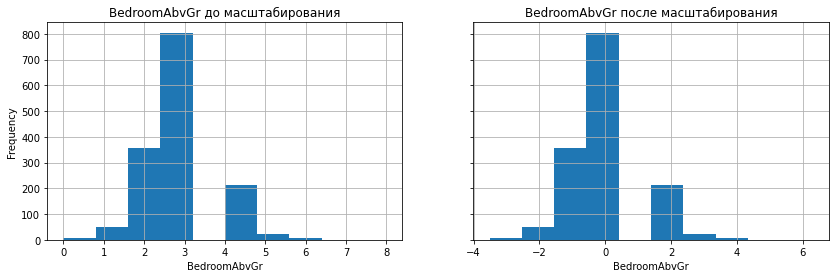

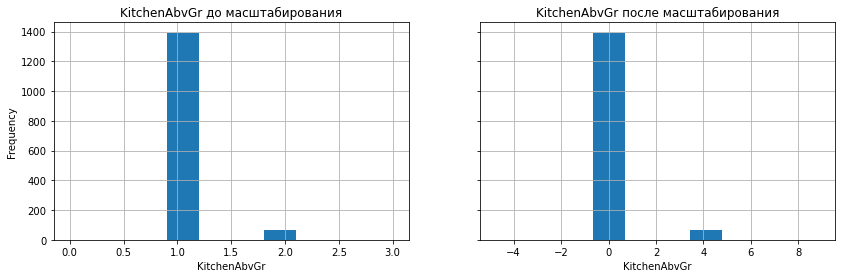

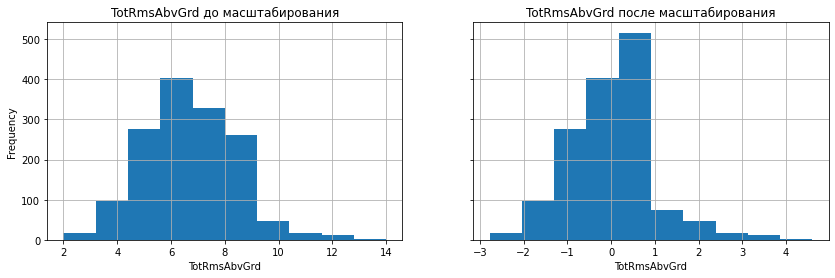

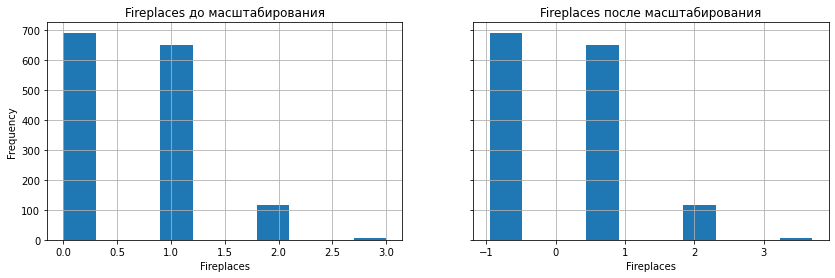

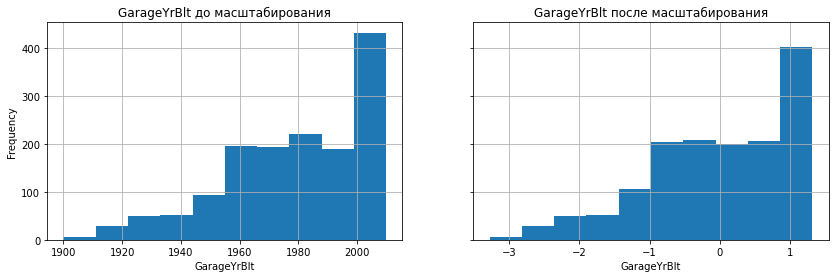

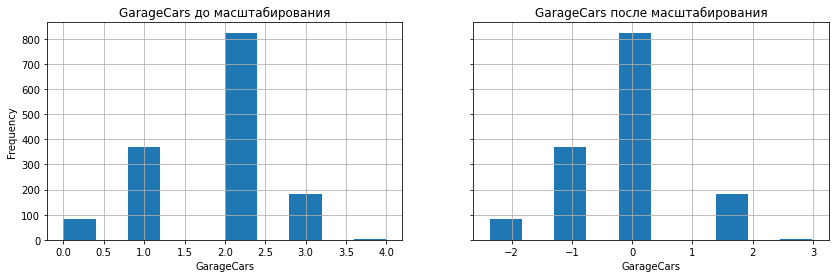

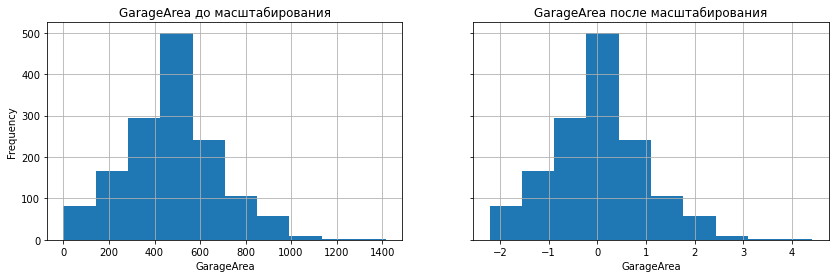

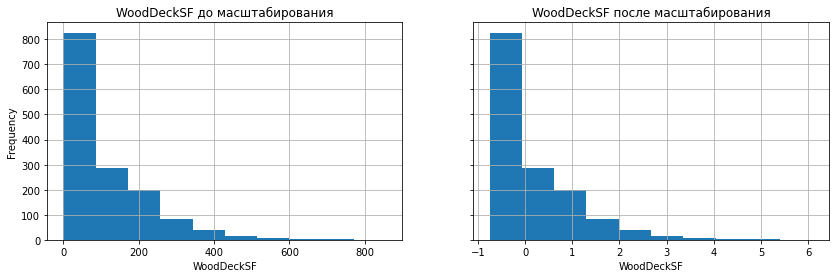

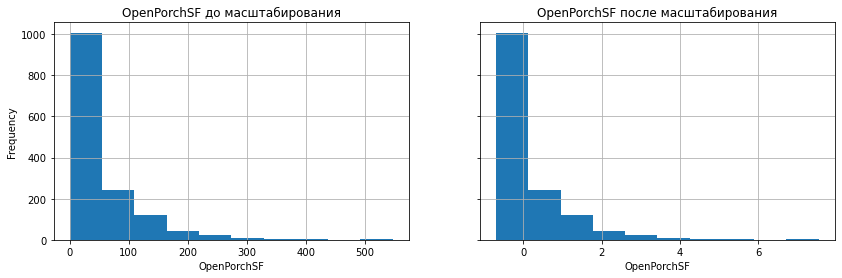

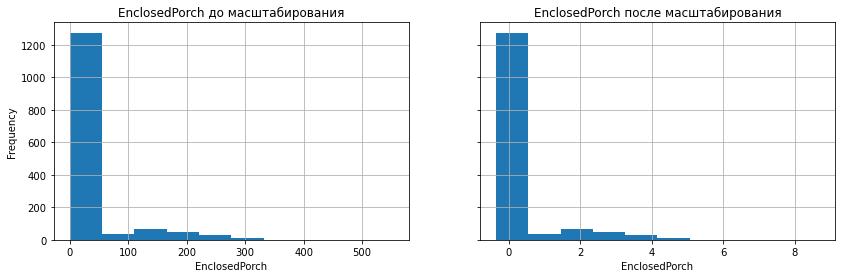

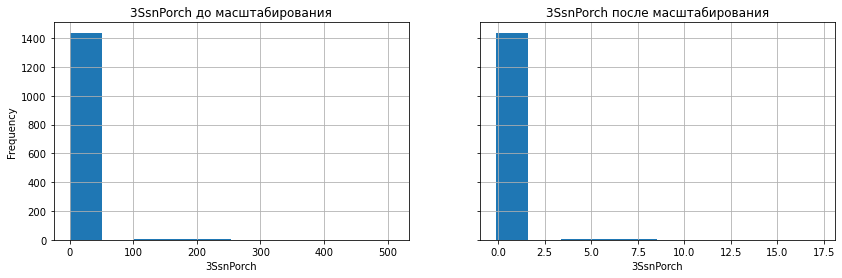

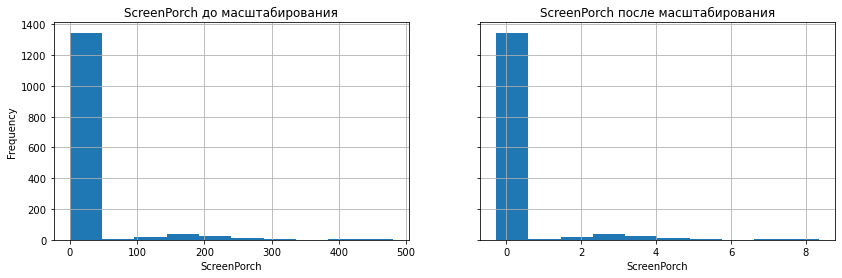

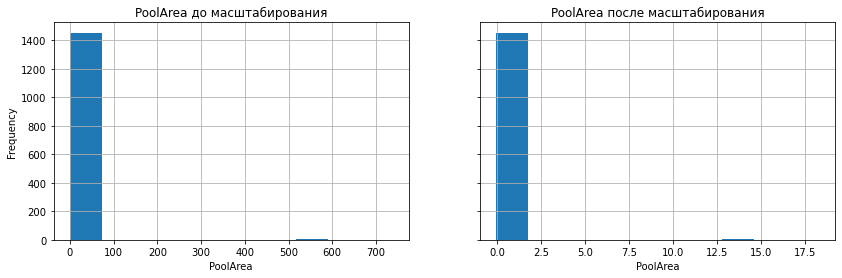

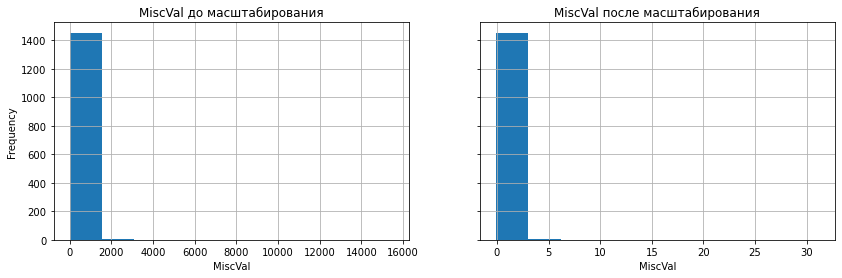

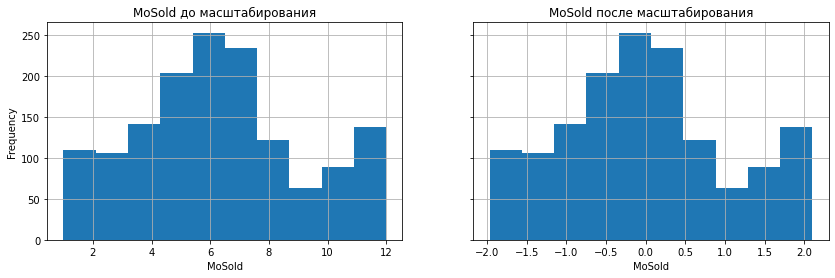

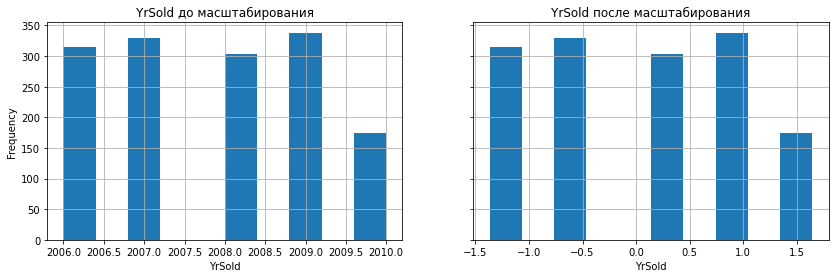

In [80]:
# Строим гистограммы числовых признаков до и после масштабирования
import matplotlib as mpl
mpl.rcParams.update({'figure.max_open_warning': 0})

for column in data3.columns:
    if column == 'SalePrice':
        continue
    if (data3[column].dtype == np.int64) or (data3[column].dtype == np.float64):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4), sharey=True)
        data2[column].plot.hist(ax=ax1, title = column+" до масштабирования")
        ax1.set_xlabel(column)
        ax1.grid(True)
        
        data3[column].plot.hist(ax=ax2, title = column+" после масштабирования")
        ax2.set_xlabel(column)
        ax2.grid(True)

<span style="color:blue">
После масштабирования все числовые признаки стали примерно одного порядка. 
</span>

### Задание 2.4 <a id="task24"></a>

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

In [22]:
# Выполняем one-hot encoding для всех категориальных признаков      
cat_features_mask = (data3.dtypes == "object").values        
#cat_dum_data = pd.get_dummies(data3[data3.columns[cat_features_mask]], drop_first=True)
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_dum_data = pd.DataFrame(data=enc.fit_transform(data3[data3.columns[cat_features_mask]]))

# Итоговый датасет data_norm
data_norm = pd.concat([num_x_data, cat_dum_data, data3['SalePrice']], axis=1)
print('Кол-во колонок у итогового датасета: {}'.format(data_norm.shape[1]))

Кол-во колонок у итогового датасета: 305


### Задание 2.5 <a id="task25"></a>

- Постройте гистограмму распределения предсказываемого значения. 
- Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `np.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. 
- Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

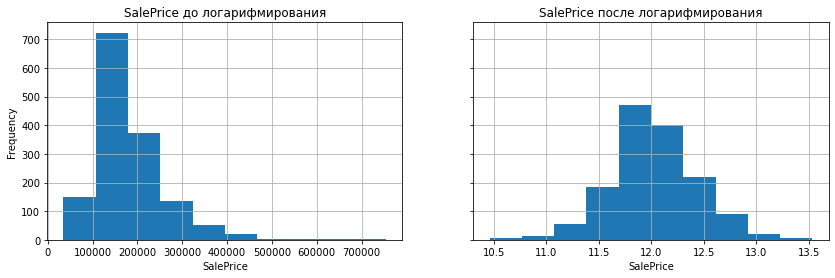

In [23]:
# your code here
# Строим гистограммы SalePrice до и после логарифмирования
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4), sharey=True)
data_norm['SalePrice'].plot.hist(ax=ax1, title = "SalePrice до логарифмирования")
ax1.set_xlabel('SalePrice')
ax1.grid(True)
        
data_norm['log1p_SalePrice'] = np.log1p(data_norm['SalePrice'])
data_norm['log1p_SalePrice'].plot.hist(ax=ax2, title = "SalePrice после логарифмирования")
ax2.set_xlabel('SalePrice')
ax2.grid(True)

``` Опишите свои наблюдения.```

<span style="color:blue">
После логарифмирования гистограмма стала больше напоминать кривую нормального 
закона распределения. Кроме того, значения SalePrice уменьшились на несколько 
порядков и стали иметь тот же масштаба, что и входные переменные.
</span>

---
Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [81]:
# Разбиваем выборку на обучающую и контрольную
X_train, X_val, y_train, y_val = \
train_test_split(data_norm.drop(['SalePrice', 'log1p_SalePrice'], axis=1), data_norm['log1p_SalePrice'], random_state=13)

In [82]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 304), (365, 304), (1095,), (365,))

### Задание 2.6 <a id="task26"></a>

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [83]:
# your code here
# Строим модель обычной линейной регрессии (L)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train) 
rmse_train = mean_squared_error(y_train_pred, y_train, squared=False)

y_val_pred = lr.predict(X_val) 
rmse_val = mean_squared_error(y_val_pred, y_val, squared=False)
print("Результаты линейной регрессии без регуляризации (L):")
print("rmse_train: {:.4f}, rmse_val: {:.4f}, отклонение: {:.2f}%".format(rmse_train, rmse_val, (rmse_val/rmse_train-1)*100))

Результаты линейной регрессии без регуляризации (L):
rmse_train: 0.0838, rmse_val: 1862252281.6563, отклонение: 2222752565176.05%


``` Опишите свои наблюдения.```

<span style="color:blue">
Большая ошибка на валидационной выборке говорит о значительном переобучении модели. 
Это может быть вызвано мультиколлениарностью и разреженностью признаков из-за 
использования не самого оптимального варианта кодирования (one-hot encoding).
</span>

### Задание 2.7 <a id="task27"></a>

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). 

Для подбора коэффициента регуляризации будем использовать кросс-валидацию (вспомните, что такое кросс-валидация и зачем она нужна). 

`GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в [документаци](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

1. Прочитайте документацию `sklearn.model_selection.GridSearchCV`
2. Подберите оптимальный гиперпараметр для LASSO:
    - В качестве сетки используйте `np.logspace(-5, 1)`
    - Используйте 5-Fold Cross-Validation
3. Используя оптимальное значение гиперпаметра обучите модель на всей обучающей выборке, посчитайте ошибку на тренировочной и обучающей выборках
4. Повторите п. 2-3 для модели Ridge

In [84]:
# Сетка для поиска лучшего параметра alpha
grid = {'alpha': np.logspace(-5, 1)}

In [86]:
# your Lasso code here
# Строим модель линейной регрессии с регуляризацией Lasso (L1)
lasso = Lasso(max_iter=4000)
gsl = GridSearchCV(lasso, grid)
gsl.fit(X_train, y_train)
best_lasso_alpha = gsl.best_params_['alpha']

best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=4000)
best_lasso.fit(X_train, y_train)

y_train_pred = best_lasso.predict(X_train) 
rmse_train = mean_squared_error(y_train_pred, y_train, squared=False)

y_val_pred = best_lasso.predict(X_val) 
rmse_val = mean_squared_error(y_val_pred, y_val, squared=False)

print("Лучший параметр альфа для Lasso: {:.4f}".format(best_lasso_alpha))
print("Результаты Lasso с лучшим параметром альфа:")
print("rmse_train: {:.4f}, rmse_val: {:.4f}, отклонение: {:.2f}%".format(rmse_train, rmse_val, (rmse_val/rmse_train-1)*100))

Лучший параметр альфа для Lasso: 0.0005
Результаты Lasso с лучшим параметром альфа:
rmse_train: 0.0951, rmse_val: 0.2169, отклонение: 128.21%


In [87]:
# your Ridge code here
# Строим модель линейной регрессии с регуляризацией Ridge (L2)
ridge = Ridge(max_iter=4000)
gsr = GridSearchCV(ridge, grid)
gsr.fit(X_train, y_train)
best_ridge_alpha = gsr.best_params_['alpha']

best_ridge = Ridge(alpha=best_ridge_alpha, max_iter=4000)
best_ridge.fit(X_train, y_train)

y_train_pred = best_ridge.predict(X_train) 
rmse_train = mean_squared_error(y_train_pred, y_train, squared=False)

y_val_pred = best_ridge.predict(X_val) 
rmse_val = mean_squared_error(y_val_pred, y_val, squared=False)

print("Лучший параметр альфа для Ridge: {:.4f}".format(best_ridge_alpha))
print("Результаты Ridge с лучшим параметром альфа:")
print("rmse_train: {:.4f}, rmse_val: {:.4f}, отклонение: {:.2f}%".format(rmse_train, rmse_val, (rmse_val/rmse_train-1)*100))

Лучший параметр альфа для Ridge: 10.0000
Результаты Ridge с лучшим параметром альфа:
rmse_train: 0.0912, rmse_val: 0.2168, отклонение: 137.78%


<span style="color:blue">
В данном примере лучшие результаты показала модель L1.
</span>

### Задание 2.8 <a id="task28"></a>

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

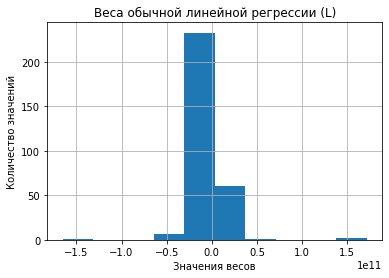

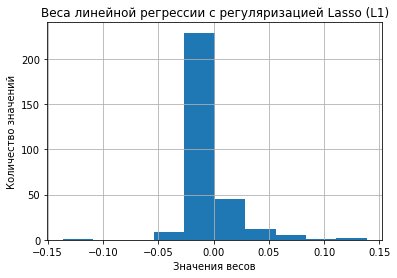

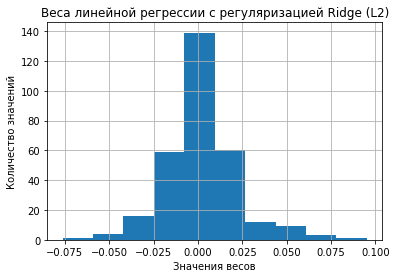

In [88]:
# your code here
# Строим гистограммы гистограммы значений весов для всех 3-х моделей
plt.hist(lr.coef_)
plt.title("Веса обычной линейной регрессии (L)")
plt.xlabel("Значения весов")
plt.ylabel("Количество значений")
plt.grid(True)
plt.show()

plt.hist(best_lasso.coef_)
plt.title("Веса линейной регрессии с регуляризацией Lasso (L1)")
plt.xlabel("Значения весов")
plt.ylabel("Количество значений")
plt.grid(True)
plt.show()

plt.hist(best_ridge.coef_)
plt.title("Веса линейной регрессии с регуляризацией Ridge (L2)")
plt.xlabel("Значения весов")
plt.ylabel("Количество значений")
plt.grid(True)
plt.show()

``` Опишите свои наблюдения.```

<span style="color:blue">
Как и следовало ожидать, после реуляризации веса уменьшились, часть признаков обнулилась, 
и их распределение стало ближе к нормальному. 
Все это позволило уменьшить мультиколлениарность и в итоге снизить эффект переобучения.
</span>

### Задание 2.9 (Бонус) <a id="task29"></a>

- Скачайте тестовые данные из соревнования [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv)
- Примените к ним те же шаги предобработки (заполнение пропусков, масштабирование, и т.д.)
- Выберите лучшую модель, которую вам удалось обучить и предскажите с ее помощью цену 
- На забудьте, что ваша модель предсказывает логарифм (см. Задание 5), так что нужно применить обратное преобразование
- Загрузите ваши прогнозы на Kaggle (`Submit Prediction`) и узнайте их точность. 

In [89]:
# your code here
# Скачиваем тестовую выборку 
test_data = pd.read_csv('test.csv', header=0)
test_data.drop('Id', axis=1, inplace=True)
test_data.shape

(1459, 79)

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [91]:
# Заполняем пропуски (создаем новые imputers, т.к. предыдущие были обучены на данных, включавших SalePrice)
cat_features_mask = (test_data.dtypes == "object").values
cat_test_data = test_data[test_data.columns[cat_features_mask]]
num_test_data = test_data[test_data.columns[~cat_features_mask]]

cat_imp = SimpleImputer(strategy="constant", fill_value='NaN')
cat_test_data = pd.DataFrame(data=cat_imp.fit_transform(cat_test_data), columns=cat_test_data.columns)

num_imp = SimpleImputer(strategy="mean")
num_test_data = pd.DataFrame(data=num_imp.fit_transform(num_test_data), columns=num_test_data.columns)

# Заполненный тестовый датасет test_data2
test_data2 = pd.concat([num_test_data, cat_test_data], axis=1)

In [92]:
# Масштабируем числовые признаки (используем ранее обученный scaler)
num_x_columns = []
for column in test_data2.columns:
    if (test_data2[column].dtype == np.int64) or (test_data2[column].dtype == np.float64):
        num_x_columns.append(column)

cat_features_mask = (test_data2.dtypes == "object").values        
cat_test_data = test_data2[test_data2.columns[cat_features_mask]]
num_x_test_data = pd.DataFrame(data=scaler.transform(test_data2[num_x_columns]), columns=num_x_columns)

# Заполненный и отмасштабированный тестовый датасет test_data3
test_data3 = pd.concat([num_x_test_data, cat_test_data], axis=1)

In [93]:
# Выполняем one-hot encoding для всех категориальных признаков (используем ранее обученный encoder)     
cat_features_mask = (test_data3.dtypes == "object").values 
#cat_dum_test_data = pd.get_dummies(test_data3[test_data3.columns[cat_features_mask]], drop_first=True)
cat_dum_test_data = pd.DataFrame(data=enc.transform(test_data3[test_data3.columns[cat_features_mask]]))

# Итоговый тестовый датасет test_data_norm
test_data_norm = pd.concat([num_x_test_data, cat_dum_test_data], axis=1)
print('Кол-во колонок у итогового тестового датасета: {}'.format(test_data_norm.shape[1]))

Кол-во колонок у итогового тестового датасета: 304


In [94]:
X_test = test_data_norm

# Для предсказания используем модель L1, которая показала лучшие результаты      
log1p_y_test_pred = best_lasso.predict(X_test) 

In [95]:
y_test_pred = pd.DataFrame(data=np.expm1(log1p_y_test_pred), columns=['SalePrice'])
index = pd.DataFrame(data=np.arange(1461, 1461+len(y_test_pred), dtype=int), columns=['Id'])
output_df = pd.concat([index, y_test_pred], axis=1)
output_df.to_csv("kaggle_house_prices_y_test_pred.csv", index=False)

<span style="color:blue">

Результат проверки на Kaggle: 
- Score: 0.13176
- Позиция в LeaderBoard: [1568](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard#score)

</span>